In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install joblib

In [2]:
# Step 1: importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
import joblib

In [3]:
# Step2: Load the dataset (update the filename accordingly)
df1 = pd.read_csv("irigation_System_data.csv")


In [4]:
# Step 3: Preprossing steps 
#first 5 rows to be printed, df.head()
df1.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [5]:
# Information of dataset ( like no or columns, shape, size, datatype, memort occupies)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [6]:
# Total columns list in datasets
df1.columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [7]:
df1.isnull().sum()

Unnamed: 0    0
sensor_0      0
sensor_1      0
sensor_2      0
sensor_3      0
sensor_4      0
sensor_5      0
sensor_6      0
sensor_7      0
sensor_8      0
sensor_9      0
sensor_10     0
sensor_11     0
sensor_12     0
sensor_13     0
sensor_14     0
sensor_15     0
sensor_16     0
sensor_17     0
sensor_18     0
sensor_19     0
parcel_0      0
parcel_1      0
parcel_2      0
dtype: int64

In [8]:
# Drop not useful columns ( axis 1= columns, axis 0 = row)
df1 = df1.drop('Unnamed: 0', axis=1)
df1.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [9]:
# Statistics of the dataset
df1.describe()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,1.901000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,1.518668,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,2.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,3.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,9.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [10]:
df = df1.columns
df

Index(['sensor_0', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'parcel_0',
       'parcel_1', 'parcel_2'],
      dtype='object')

 0 Boxplot of columns: Index(['sensor_0'], dtype='object')


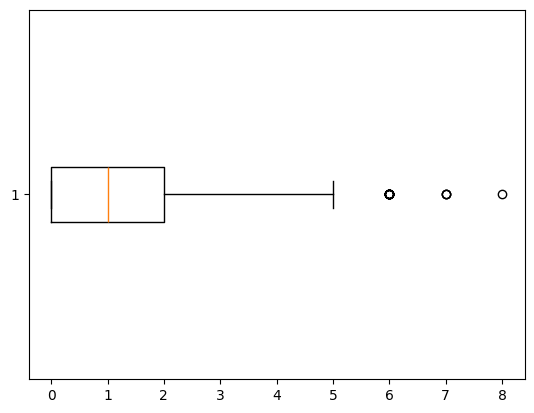

 1 Boxplot of columns: Index(['sensor_1'], dtype='object')


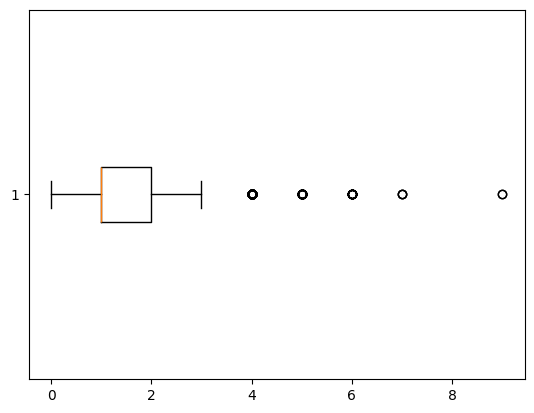

 2 Boxplot of columns: Index(['sensor_2'], dtype='object')


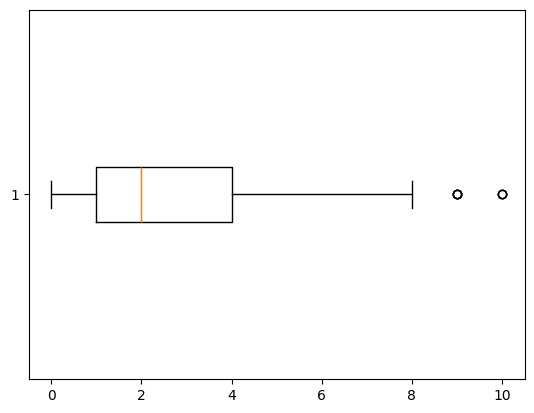

 3 Boxplot of columns: Index(['sensor_3'], dtype='object')


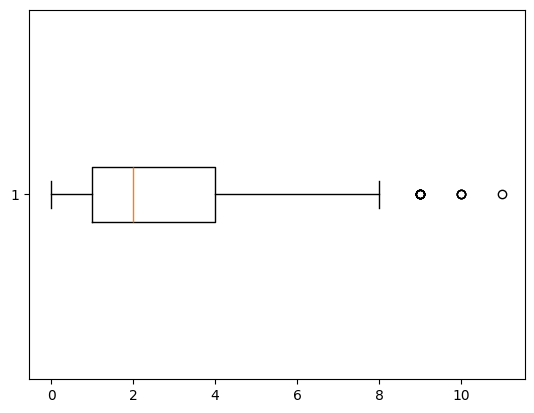

 4 Boxplot of columns: Index(['sensor_4'], dtype='object')


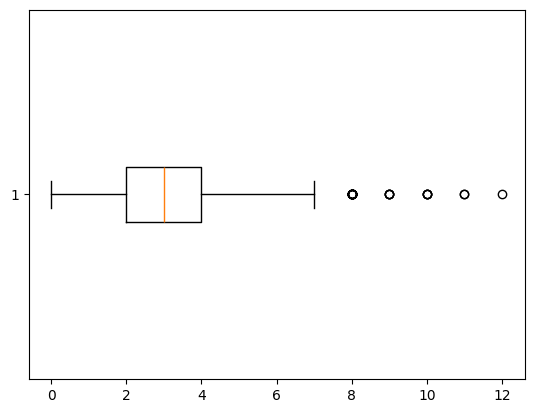

 5 Boxplot of columns: Index(['sensor_5'], dtype='object')


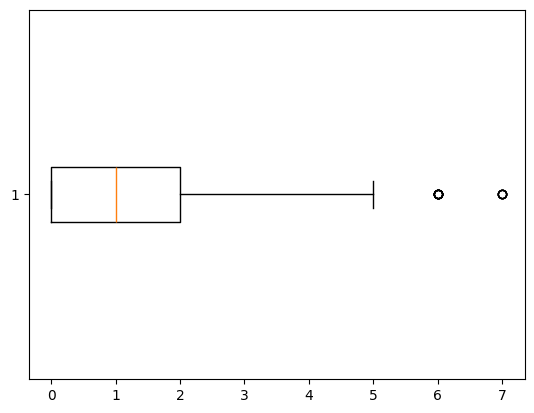

 6 Boxplot of columns: Index(['sensor_6'], dtype='object')


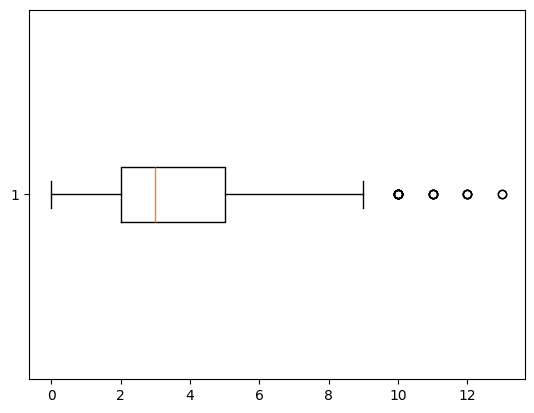

 7 Boxplot of columns: Index(['sensor_7'], dtype='object')


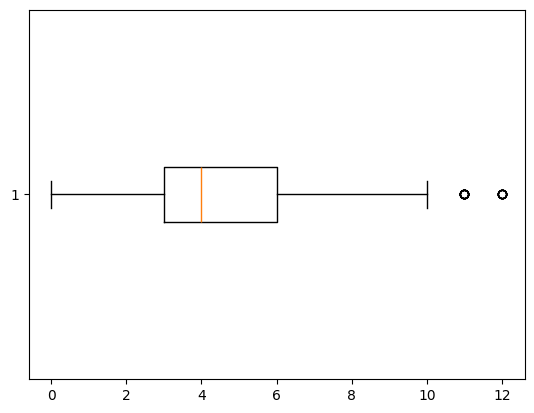

 8 Boxplot of columns: Index(['sensor_8'], dtype='object')


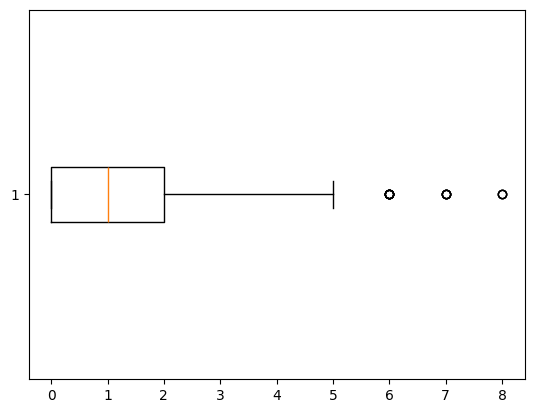

 9 Boxplot of columns: Index(['sensor_9'], dtype='object')


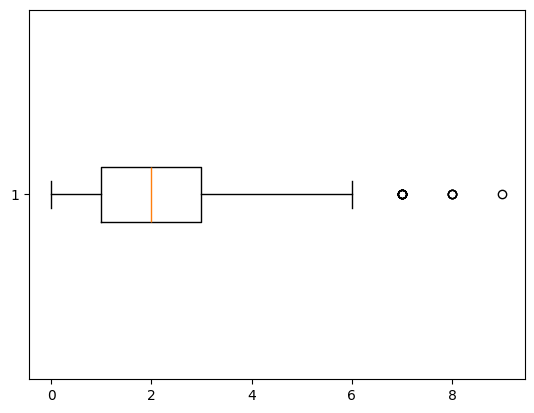

 10 Boxplot of columns: Index(['sensor_10'], dtype='object')


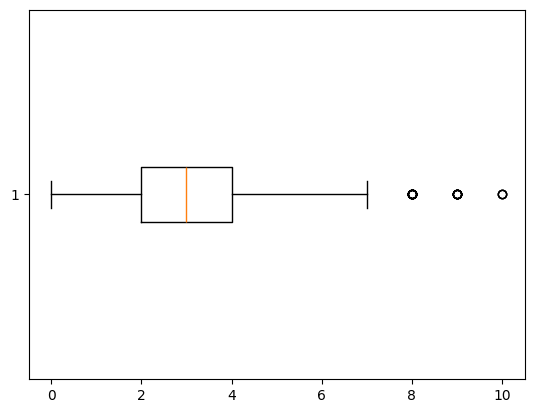

 11 Boxplot of columns: Index(['sensor_11'], dtype='object')


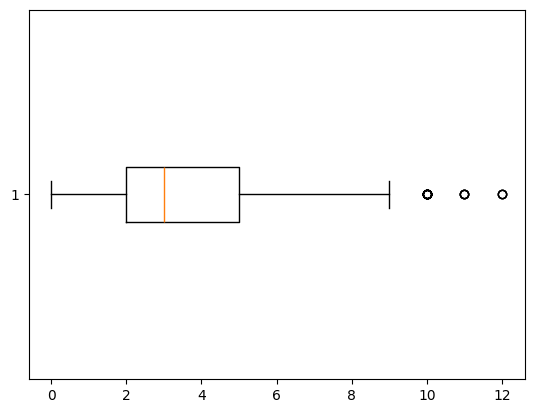

 12 Boxplot of columns: Index(['sensor_12'], dtype='object')


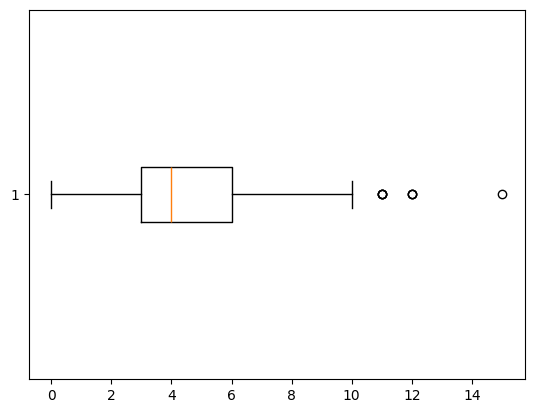

 13 Boxplot of columns: Index(['sensor_13'], dtype='object')


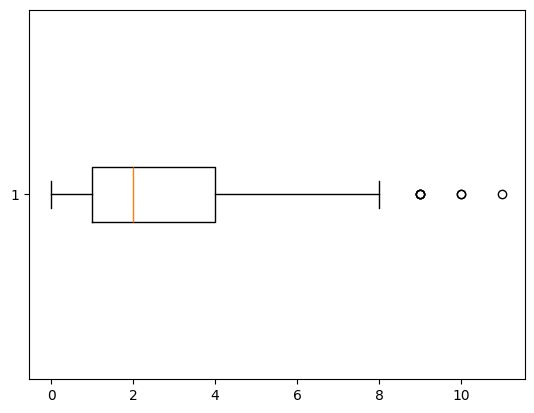

 14 Boxplot of columns: Index(['sensor_14'], dtype='object')


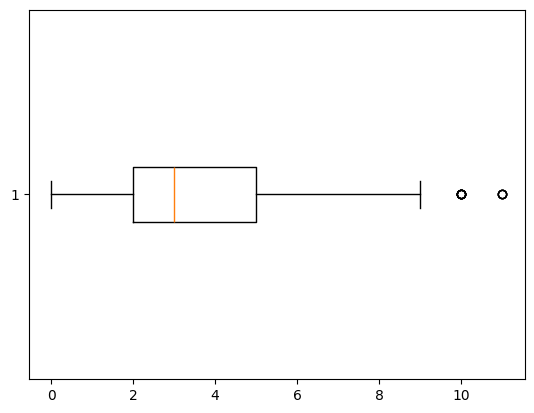

 15 Boxplot of columns: Index(['sensor_15'], dtype='object')


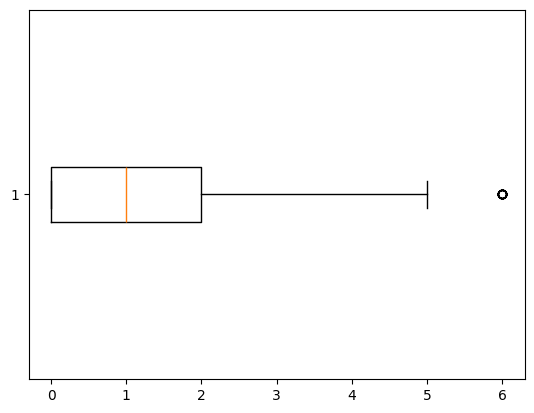

 16 Boxplot of columns: Index(['sensor_16'], dtype='object')


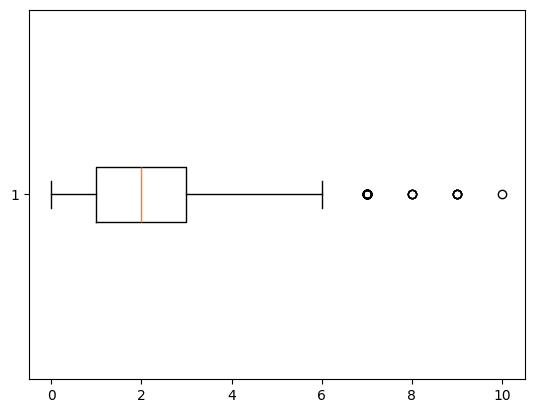

 17 Boxplot of columns: Index(['sensor_17'], dtype='object')


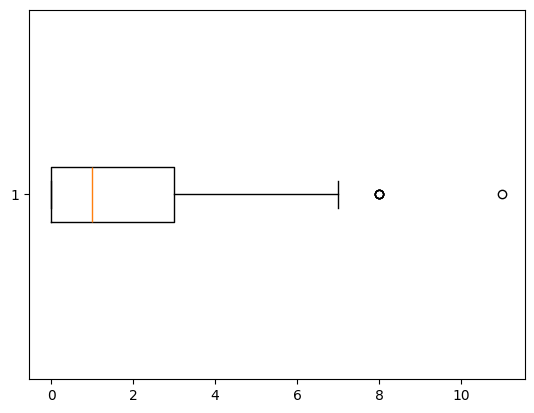

 18 Boxplot of columns: Index(['sensor_18'], dtype='object')


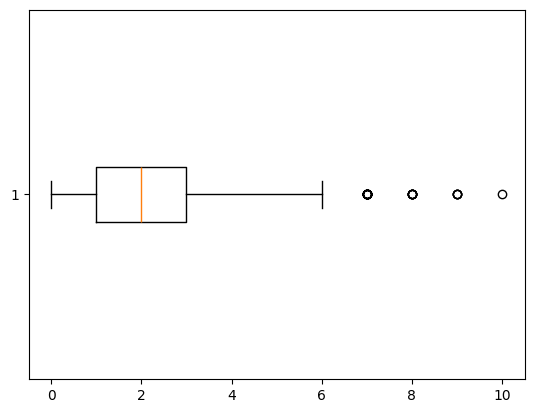

 19 Boxplot of columns: Index(['sensor_19'], dtype='object')


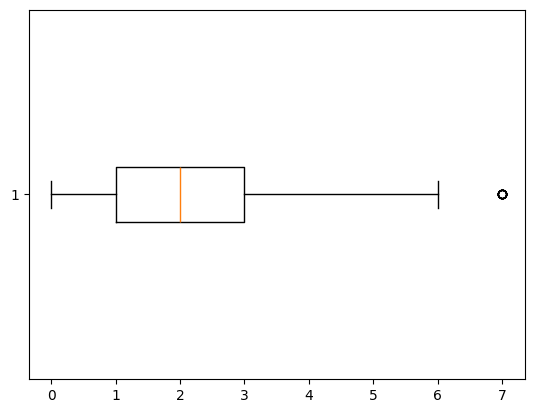

 20 Boxplot of columns: Index(['parcel_0'], dtype='object')


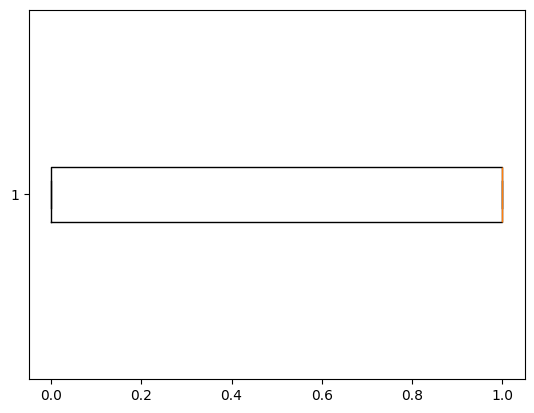

 21 Boxplot of columns: Index(['parcel_1'], dtype='object')


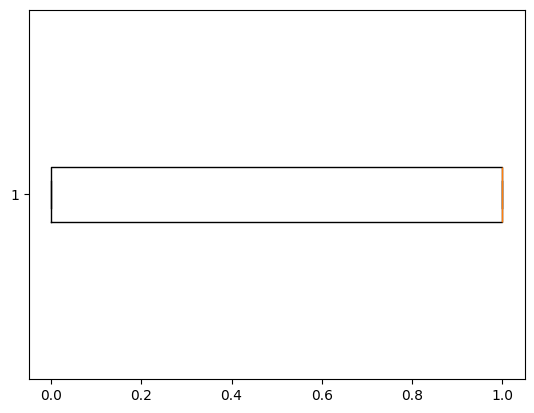

 22 Boxplot of columns: Index(['parcel_2'], dtype='object')


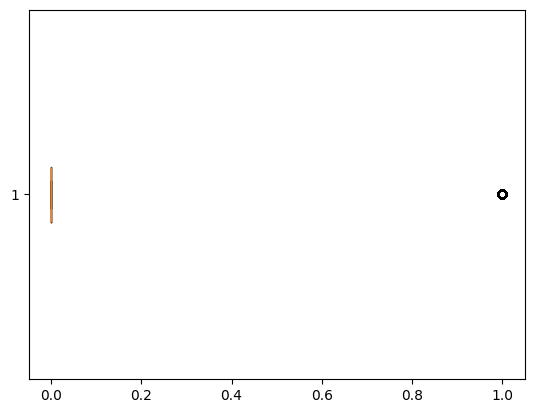

In [11]:
import matplotlib.pyplot as plt
df = df1.columns
for i in range(len(df)):
    print(f" {i} Boxplot of columns: {df[[i]]}")
    plt.boxplot(df1[df[i]], vert = False)
    plt.show()


In [12]:
# STEP 4: DEFINE FEATURES AND LABELS


X = df1.iloc[:, 0:20]   # This gives you columns 0 to 19 (sensor_0 to sensor_19)


y = df1.iloc[:, 20:]    # This gives the columns 20 to last (parcel_0 to parcel1)

In [13]:
X.sample(10)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
523,3.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,2.0,1.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0
533,1.0,1.0,4.0,2.0,6.0,0.0,5.0,8.0,1.0,5.0,2.0,3.0,6.0,1.0,2.0,0.0,1.0,3.0,2.0,3.0
188,1.0,3.0,4.0,3.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,1.0,4.0,1.0,3.0,0.0,2.0,1.0,2.0,3.0
1663,4.0,3.0,1.0,1.0,3.0,0.0,2.0,5.0,2.0,4.0,3.0,1.0,5.0,2.0,3.0,3.0,2.0,2.0,0.0,2.0
1886,1.0,1.0,3.0,5.0,1.0,0.0,2.0,4.0,0.0,2.0,5.0,1.0,3.0,8.0,7.0,1.0,0.0,1.0,3.0,3.0
171,4.0,1.0,1.0,1.0,3.0,3.0,3.0,4.0,1.0,4.0,5.0,1.0,2.0,5.0,0.0,1.0,3.0,4.0,3.0,5.0
630,1.0,0.0,3.0,1.0,2.0,3.0,7.0,3.0,0.0,1.0,1.0,2.0,6.0,6.0,3.0,1.0,2.0,7.0,3.0,3.0
1368,1.0,3.0,3.0,8.0,1.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,6.0,2.0,6.0,1.0,1.0,0.0,2.0,0.0
48,0.0,0.0,0.0,0.0,5.0,1.0,5.0,4.0,0.0,0.0,1.0,2.0,6.0,1.0,3.0,4.0,4.0,2.0,1.0,0.0
1124,3.0,0.0,3.0,1.0,4.0,0.0,5.0,5.0,1.0,0.0,2.0,5.0,1.0,2.0,2.0,4.0,3.0,4.0,2.0,2.0


In [14]:
# View any ramdom sample from dataset
y.sample(10)

,parcel_0,parcel_1,parcel_2
1462,0,1,0
243,0,0,0
1290,1,1,1
48,1,0,0
230,1,1,0
606,1,1,0
1527,1,1,0
1745,0,0,0
703,0,0,0
1871,1,1,0


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float

In [16]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parcel_0  2000 non-null   int64
 1   parcel_1  2000 non-null   int64
 2   parcel_2  2000 non-null   int64
dtypes: int64(3)
memory usage: 47.0 KB


In [17]:
X

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,1.0,0.0,6.0,2.0
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,3.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,1.0,0.0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,0.0,2.0,0.0,3.0,0.0


In [18]:
# Shape of dataset that define newly
X.shape, y.shape

((2000, 20), (2000, 3))